In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
from google.colab import drive 
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [ ]:
df_user = pd.read_csv('gdrive/My Drive/Bridebook Task/Bridebook - DS - challengeData.1634399212.1655207796.csv')
#First thing is to check the Dataframe for any missing values.
df_user.isnull().sum()
df_user.dtypes
df_user['regTime'] = pd.to_datetime(df_user['regTime'], unit='ms')

In [ ]:
#How long did the study take place
print(df_user['regTime'].max() - df_user['regTime'].min())

13 days 15:46:40


In [ ]:
#Lets check the descriptive analysis of all Categorical and Numeric labels we have.
df_user.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,userId,regTime,testVariant,primaryAccount,regPage,device,app,browser,browserVersion,screenHeight,...,addedGuestCount,addedBudget,invitedCollaborator,addedNames,finOnb,searchCTA,venEnq,venSearch,venViews,sessions
count,1051.000000,1051,1051.000000,1051,1051,1051,1051,1051,409.000000,1051.000000,...,1051,1051,1051,1051,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
unique,NaN,108,NaN,2,3,3,2,2,NaN,NaN,...,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-02-05 21:20:00,NaN,True,/,iPhone,True,Mobile Safari,NaN,NaN,...,True,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,39,NaN,1027,1046,606,1048,642,NaN,NaN,...,702,594,659,998,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-01-29 08:46:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-02-12 00:33:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,661.509990,NaN,0.600381,NaN,NaN,NaN,NaN,NaN,76.655257,766.986679,...,NaN,NaN,NaN,NaN,0.915319,0.466223,0.871551,5.079924,5.049477,3.367269
std,322.209593,NaN,0.747160,NaN,NaN,NaN,NaN,NaN,0.734966,116.937459,...,NaN,NaN,NaN,NaN,0.278539,0.499095,2.625817,10.025552,11.576225,3.696618
min,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,70.000000,424.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,409.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,76.000000,667.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
#Creating a list of the columns to remove from the data set as unnecessary.
rem_cols = ['regPage','device','browserVersion','screenHeight','screenWidth']
df_user = df_user.drop(rem_cols,axis=1)


In [ ]:
finOb_df = df_user.loc[df_user["finOnb"]==1,['locationStep','addedCity','locationCountry','addedGuestCount','addedBudget','addedNames','finOnb','venEnq']]
finOb_df

,locationStep,addedCity,locationCountry,addedGuestCount,addedBudget,addedNames,finOnb,venEnq
0,completed,0,NaN,True,True,True,1,0
1,completed,0,NaN,True,True,True,1,0
2,completed,0,NaN,True,False,True,1,1
3,completed,1,England,True,True,True,1,0
4,completed,0,NaN,False,True,True,1,0
...,...,...,...,...,...,...,...,...
1046,completed,0,NaN,True,True,True,1,0
1047,completed,0,NaN,True,True,True,1,0
1048,completed,1,England,True,True,True,1,1
1049,completed,1,England,False,False,True,1,0


In [ ]:
#Creating a Feature that just record whether the registered user did make enquiries, searches or viewed a venue or not.

df_user['didEnq'] = np.where(df_user['venEnq']>=1,1,0)
df_user['didSearch'] = np.where(df_user['venSearch']>=1,1,0)
df_user['didView'] = np.where(df_user['venViews']>=1,1,0)


In [ ]:
#Split Registered users by test Variant.
#Var0
df_Var0 = df_user[df_user['testVariant'] == 0] 
Var0Size = df_Var0.shape[0]
#Var1
df_Var1 = df_user[df_user['testVariant'] == 1] 
Var1Size = df_Var1.shape[0]
#Var2
df_Var2 = df_user[df_user['testVariant'] == 2] 
Var2Size = df_Var2.shape[0]
print(Var0Size,Var1Size,Var2Size)
#  we deduced that there are 587, 297 and 167 samples for Control, Variant1, Variant 2 respectively

587 297 167


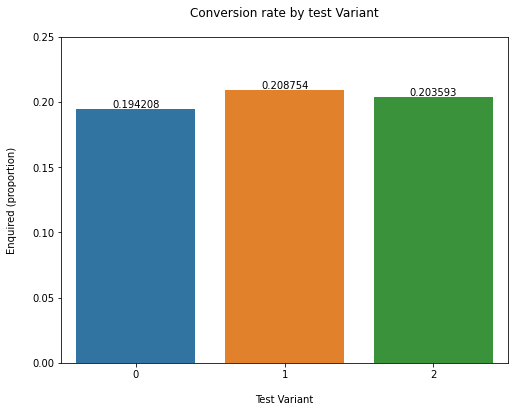

In [ ]:
#Plot to show ratio of new users who did Enquire about Venue(s)
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df_user['testVariant'], y=df_user['didEnq'], ci=False)
ax.bar_label(ax.containers[0])
plt.ylim(0, 0.25)
plt.title('Conversion rate by test Variant', pad=20)
plt.xlabel('Test Variant', labelpad=15)
plt.ylabel('Enquired (proportion)', labelpad=15);

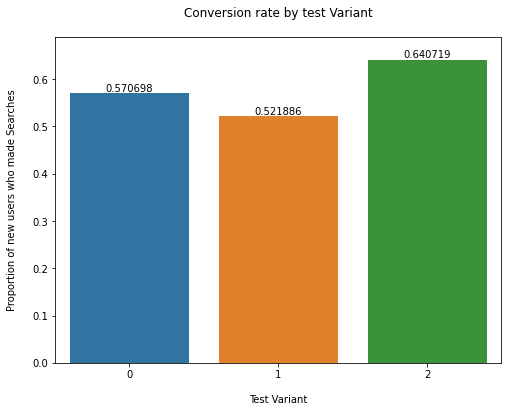

In [ ]:
#Plot to show ratio of new users who did Enquire about Venue(s)
plt.figure(figsize=(8,6))
ax=sns.barplot(x=df_user['testVariant'], y=df_user['didSearch'], ci=False)
ax.bar_label(ax.containers[0])
plt.ylim(0, 0.69)
plt.title('Conversion rate by test Variant', pad=20)
plt.xlabel('Test Variant', labelpad=15)
plt.ylabel('Proportion of new users who made Searches', labelpad=15);


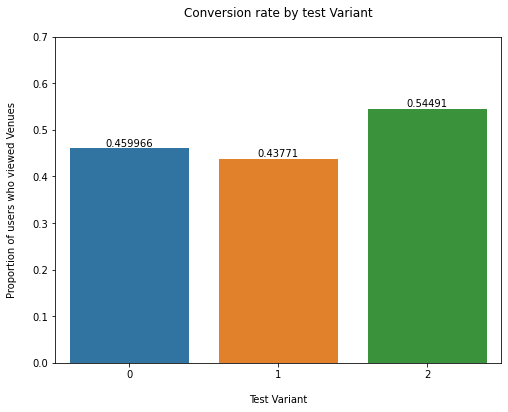

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df_user['testVariant'], y=df_user['didView'], ci=False)
ax.bar_label(ax.containers[0])
plt.ylim(0, 0.70)
plt.title('Conversion rate by test Variant', pad=20)
plt.xlabel('Test Variant', labelpad=15)
plt.ylabel('Proportion of users who viewed Venues', labelpad=15);

In [ ]:
std_p = lambda x: np.std(x, ddof=0)
print(std_p(df_Var0['didEnq']))
print(std_p(df_Var1['didEnq']))
print(std_p(df_Var2['didEnq']))
# This is to show that we can calculate the Std.Dev and thus could go for a z-test instead of the t-test as we have more than 30 samples in each sample set.

0.39558962665295117
0.40641836705741163
0.4026695671486091


In [ ]:
# We will assume a Confidence interval of 95% keeping a Significance level of alpha=0.05

#Get results for all variants
control_results = df_Var0['didEnq']
var1_results = df_Var1['didEnq']
var2_results = df_Var2['didEnq']

#Ser1 is control 
def doZtest(ser1,ser2):
  cntList = [ser1.count(), ser2.count()]
  convList = [ser1.sum(),ser2.sum()]
  #Calculate the Z-score
  z_stat, pval = proportions_ztest(convList, nobs=cntList)
  
  (lower_ser1, lower_ser2),(upper_ser1, upper_ser2) = proportion_confint(convList, nobs=cntList, alpha=0.05)

  print("Z-Stat: ",z_stat)
  print("p-Value: ", pval)
  print("95% Confidence Interval of control group",[lower_ser1,upper_ser1])
  print("95% Confidence Interval of treatment",[lower_ser2, upper_ser2])


#Create Z-test function and perform Z-tests. 


In [ ]:

doZtest(control_results,var1_results)

Z-Stat:  -0.5115700888871251
p-Value:  0.6089519237589676
95% Confidence Interval of control group [0.16220607120075387, 0.2262096017123637]
95% Confidence Interval of treatment [0.16253279840494228, 0.2549756191034752]


In [ ]:
doZtest(control_results, var2_results)

Z-Stat:  -0.2694195114664475
p-Value:  0.7876068731060268
95% Confidence Interval of control group [0.16220607120075387, 0.2262096017123637]
95% Confidence Interval of treatment [0.14252130364078425, 0.2646643251017307]


In [ ]:
control_results2 = df_Var0['didSearch']
var1_results2 = df_Var1['didSearch']
var2_results2 = df_Var2['didSearch']

doZtest(control_results2, var2_results2)

Z-Stat:  -1.6210530583902836
p-Value:  0.10500626005522219
95% Confidence Interval of control group [0.5306566648475952, 0.6107402687128818]
95% Confidence Interval of treatment [0.5679504858558414, 0.7134866398926617]
